# Tutorial 2: Fields and Operators

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
from dedalus.extras.plot_tools import plot_bot_2d
figkw = {'figsize':(6,4), 'dpi':100}

%matplotlib inline

### Fields

Field objects in Dedalus represent scalar-valued fields defined over a set of bases (or “domain”).

In [6]:
# Set up coordinates and distributors
coords = d3.CartesianCoordinates('x', 'y')
dist = d3.Distributor(coords, dtype=np.float64)

# Set up bases
xbasis = d3.RealFourier(coords['x'], 64, bounds=(-np.pi, np.pi), dealias=3/2)
ybasis = d3.Chebyshev(coords['y'], 64, bounds=(-1, 1), dealias=3/2)

# Define field f=f(x,y)
## bases=xbasic for f=f(x)
## no bases for spatially constant
f = dist.Field(name='f', bases=(xbasis, ybasis))

In [8]:
# Define vector field u=u(x)
## 2D vector with x,y (coords) components but only varies in x (xbasis)
u = dist.VectorField(coords, name='u', bases=xbasis)

$\textbf{Manipulating data fields}$

Field objects have a variety of methods for transforming their data between different layouts (i.e. grid and coefficient space, and all the layouts in-between). The layout attribute of each field points to the layout object describing its current transform and distribution state. We can see that fields are instantiated in coefficient space:

In [9]:
f.layout.grid_space

array([False, False])

Field data can be assigned and retrieved in any layout by indexing a field with that layout object. In most cases, mixed layouts aren’t needed, and it’s just the full grid and full coefficient data that are most useful to interact with. These layouts can be easily accessed using 'g' and 'c' keys as shortcuts.

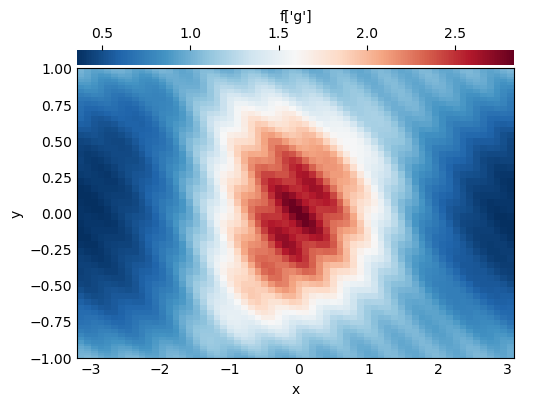

In [11]:
x, y = dist.local_grids(xbasis, ybasis)
f['g'] = np.exp((1-y**2)*np.cos(x+np.cos(x)*y**2)) * (1 + 0.05*np.cos(10*(x+2*y)))

# Plot grid values
plot_bot_2d(f, figkw=figkw, title="f['g']");

/tmp/ipykernel_1789/1812536267.py:4: RuntimeWarning: divide by zero encountered in log10
  log_mag = lambda xmesh, ymesh, data: (xmesh, ymesh, np.log10(np.abs(data)))


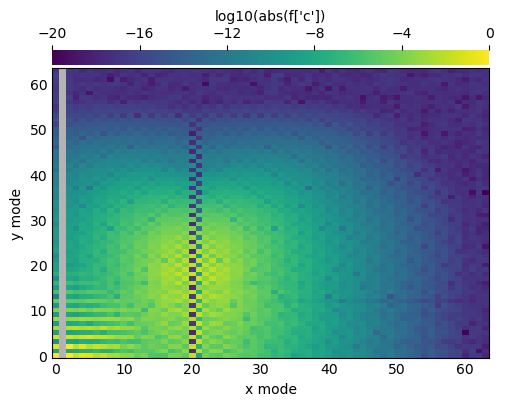

In [12]:
f['c']

# Plot log magnitude of spectral coefficients
log_mag = lambda xmesh, ymesh, data: (xmesh, ymesh, np.log10(np.abs(data)))
plot_bot_2d(f, func=log_mag, clim=(-20, 0), cmap='viridis', title="log10(abs(f['c'])", figkw=figkw);

### Differential Operators

In [13]:
lap_f = d3.Laplacian(f).evaluate()
grad_f = d3.Gradient(f).evaluate()
print('f shape:', f['g'].shape)
print('Grad(f) shape:', grad_f['g'].shape)
print('Lap(f) shape:', lap_f['g'].shape)

div_grad_f = d3.Divergence(d3.Gradient(f)).evaluate()
print('Lap(f) is Div(Grad(f)):', np.allclose(lap_f['g'], div_grad_f['g']))

f shape: (96, 96)
Grad(f) shape: (2, 96, 96)
Lap(f) shape: (96, 96)
Lap(f) is Div(Grad(f)): True
